In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [46]:
# Sample Dataset
data = {
    'Age_Group': ['18-25', '26-35', '36-45', '26-35', '36-45', '18-25', '18-25', '46-60', '46-60', '26-35'],
    'Income': [25000, 50000, 60000, 52000, 61000, 24000, 23000, 55000, 57000, 48000]
}
df = pd.DataFrame(data)

In [47]:

# 1. Summary statistics grouped by categorical variable
grouped_stats = df.groupby('Age_Group')['Income'].agg(['mean', 'median', 'min', 'max', 'std'])
print(" Summary Statistics Grouped by Age Group:")
print(grouped_stats)


 Summary Statistics Grouped by Age Group:
              mean   median    min    max          std
Age_Group                                             
18-25      24000.0  24000.0  23000  25000  1000.000000
26-35      50000.0  50000.0  48000  52000  2000.000000
36-45      60500.0  60500.0  60000  61000   707.106781
46-60      56000.0  56000.0  55000  57000  1414.213562


In [48]:
# 2. Create a list for each Age_Group
income_by_group = df.groupby('Age_Group')['Income'].apply(list).to_dict()
print("\n📋 Income Values by Age Group:")
for group, values in income_by_group.items():
    print(f"{group}: {values}")


📋 Income Values by Age Group:
18-25: [25000, 24000, 23000]
26-35: [50000, 52000, 48000]
36-45: [60000, 61000]
46-60: [55000, 57000]


In [49]:
# Part 2: Iris Dataset Summary + Preprocessing

In [50]:
# Load iris dataset
iris = sns.load_dataset("iris")

In [51]:
# 1. Check for missing values
print("\nMissing values:\n", iris.isnull().sum())


Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


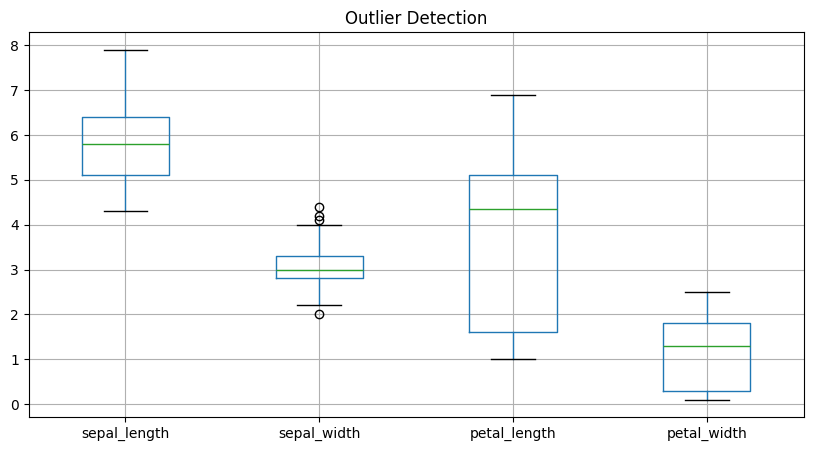

In [52]:
# 2. Check for outliers (boxplot)
iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].boxplot(figsize=(10, 5))
plt.title("Outlier Detection")
plt.show()


In [53]:
# 3. Scale & Normalize
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
iris_scaled = iris.copy()
iris_scaled[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaled_values
# print(scaled_values)

In [54]:
# 4. Descriptive statistics for each species
print("\n Descriptive Statistics by Species:")
stats_by_species = iris_scaled.groupby('species').describe().T
print(stats_by_species)


 Descriptive Statistics by Species:
species                setosa  versicolor  virginica
sepal_length count  50.000000   50.000000  50.000000
             mean    0.196111    0.454444   0.635556
             std     0.097914    0.143381   0.176633
             min     0.000000    0.166667   0.166667
             25%     0.138889    0.361111   0.534722
             50%     0.194444    0.444444   0.611111
             75%     0.250000    0.555556   0.722222
             max     0.416667    0.750000   1.000000
sepal_width  count  50.000000   50.000000  50.000000
             mean    0.595000    0.320833   0.405833
             std     0.157943    0.130749   0.134374
             min     0.125000    0.000000   0.083333
             25%     0.500000    0.218750   0.333333
             50%     0.583333    0.333333   0.416667
             75%     0.697917    0.416667   0.489583
             max     1.000000    0.583333   0.750000
petal_length count  50.000000   50.000000  50.000000
         

In [55]:
# 5. Percentiles for each species
for species in iris_scaled['species'].unique():
    print(f"\n Percentiles for {species}:")
    species_data = iris_scaled[iris_scaled['species'] == species]
    print(species_data.describe(percentiles=[.25, .5, .75]))


 Percentiles for setosa:
       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       0.196111     0.595000      0.078305     0.060833
std        0.097914     0.157943      0.029435     0.043911
min        0.000000     0.125000      0.000000     0.000000
25%        0.138889     0.500000      0.067797     0.041667
50%        0.194444     0.583333      0.084746     0.041667
75%        0.250000     0.697917      0.097458     0.083333
max        0.416667     1.000000      0.152542     0.208333

 Percentiles for versicolor:
       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       0.454444     0.320833      0.552542     0.510833
std        0.143381     0.130749      0.079646     0.082397
min        0.166667     0.000000      0.338983     0.375000
25%        0.361111     0.218750      0.508475     0.458333
50%        0.444444     0.333333      0.5677